In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
g=pd.read_csv("glass.csv")

In [21]:
g.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
g.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [23]:
g.shape

(214, 10)

In [24]:
g.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [25]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [26]:
g.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [27]:
g.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1       2
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6       1
1.51848  13.64  3.87  1.27  71.96  0.54  8.32   0.00  0.32  2       1
1.51831  14.39  0.00  1.82  72.86  1.41  6.47   2.88  0.00  7       1
1.51832  13.33  3.34  1.54  72.14  0.56  8.99   0.00  0.00  3       1
                                                                   ..
1.51707  13.48  3.48  1.71  72.52  0.62  7.99   0.00  0.00  2       1
1.51708  13.72  3.68  1.81  72.06  0.64  7.88   0.00  0.00  2       1
1.51709  13.00  3.47  1.79  72.72  0.66  8.18   0.00  0.00  2       1
1.51711  12.89  3.62  1.57  72.96  0.61  8.11   0.00  0.00  2       1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2       1
Length: 213, dtype: int64

In [30]:
x=g.iloc[:,0:9]
y=g.iloc[:,9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [40]:
kfold=KFold(n_splits=10)

In [41]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [44]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [50]:
print("best grid score:",grid.best_score_)
print("best grid params:",grid.best_params_)

best grid score: 0.640531561461794
best grid params: {'n_neighbors': 1}


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
print("with(k=1) accuracy is", knn.score(x_test,y_test))

with(k=1) accuracy is 0.7230769230769231


## Visualizing the CV results

<function matplotlib.pyplot.show(close=None, block=None)>

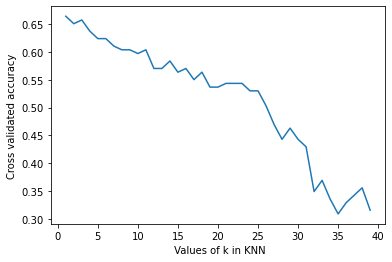

In [61]:
k_values=np.arange(1,40)
k_score=[]
for i,k in enumerate(k_values):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_test,y_test)
    k_score.append(knn.score(x_train,y_train))

plt.plot(k_values, k_score)
plt.xlabel(" Values of k in KNN")
plt.ylabel("Cross validated accuracy")
plt.show

From the plot we see that the K=0.66 is the highest peak. 0.66 is the best K Value with 63.07% which is not a good accuracy